# FAO: Who eats the food we grow
## Context

Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions for feeding the growing world population has become a hot topic for food and agriculture organizations, entrepreneurs and philanthropists. These solutions range from changing the way we grow our food to changing the way we eat. To make things harder, the world's climate is changing and it is both affecting and affected by the way we grow our food – agriculture.

## Data Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

In [3]:
fao = pd.read_csv("data/FAO.csv", encoding='latin1')
fao.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
fao.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


## Total production

In [5]:
year_totals = fao.loc[:, "Y1961":"Y2013"].sum()
year_totals.head()

Y1961    3502611.0
Y1962    3601632.0
Y1963    3685624.0
Y1964    3765645.0
Y1965    3902533.0
dtype: float64

<AxesSubplot:title={'center':'Total Produce over the years'}>

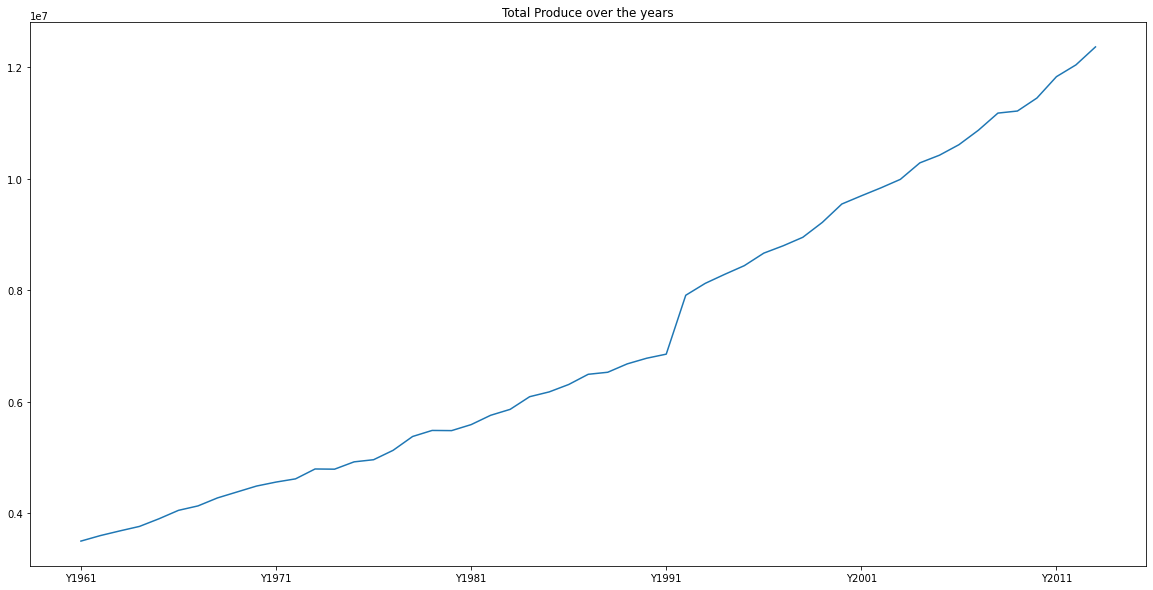

In [6]:
year_totals.plot(kind='line', title='Total Produce over the years')

## Production by Area

In [7]:
fao['Area'].drop_duplicates().count()

174

There are 174 Areas so not all countries are represented here

In [8]:
region_total = fao.loc[:]
region_total['Total Production'] = region_total.loc[:,"Y1961": "Y2013"].sum(axis=1)
region_total = region_total.drop(['Item Code', 'Element Code', 'Item', 'Unit'], axis=1)
target = region_total.groupby("Area Code")['Total Production'].sum().rename("Total Production").reset_index()
region_total.drop(region_total.loc[:, "Y1961": "Y2013"], axis=1, inplace=True)
region_total.drop(["Total Production"], axis=1, inplace=True)
region_total = region_total.drop_duplicates("Area Code").merge(target, how='left', on='Area Code').set_index('Area Code')
region_total.head()

,Area Abbreviation,Area,Element,latitude,longitude,Total Production
Area Code,,,,,,
2,AFG,Afghanistan,Food,33.94,67.71,689162.0
3,ALB,Albania,Feed,41.15,20.17,237202.0
4,DZA,Algeria,Feed,28.03,1.66,1530613.0
7,AGO,Angola,Food,-11.20,17.87,706016.0
8,ATG,Antigua and Barbuda,Food,17.06,-61.80,4446.0


<AxesSubplot:title={'center':'Production by Area'}, xlabel='Area'>

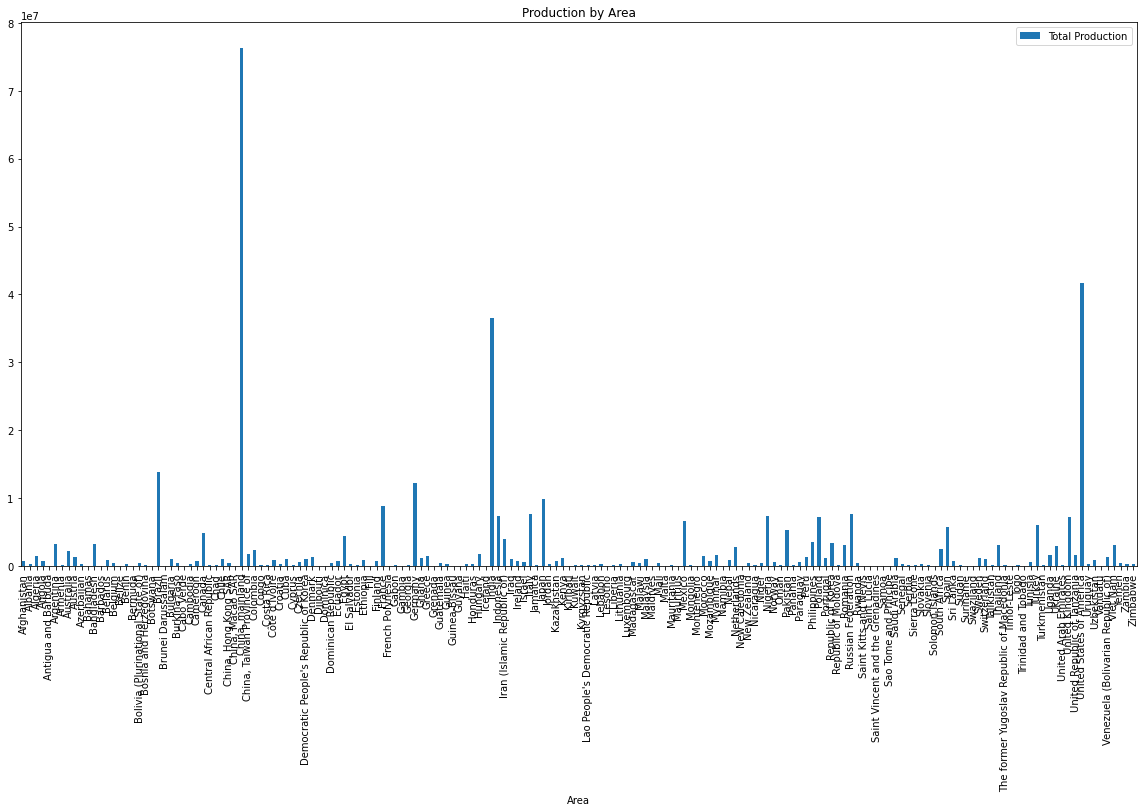

In [9]:
region_total[['Area', 'Total Production']].plot(kind='bar', x='Area', y='Total Production', title='Production by Area')

### Top 20 Contries by Production

In [10]:
top_twenty = region_total.sort_values(by='Total Production', ascending=False, axis='index').iloc[:20]
top_twenty

,Area Abbreviation,Area,Element,latitude,longitude,Total Production
Area Code,,,,,,
41,CHN,"China, mainland",Feed,35.86,104.20,76248859.0
231,USA,United States of America,Feed,37.09,-95.71,41719176.0
100,IND,India,Feed,20.59,78.96,36549150.0
21,BRA,Brazil,Feed,-14.24,-51.93,13818239.0
79,DEU,Germany,Feed,51.17,10.45,12300442.0
110,JPN,Japan,Feed,36.20,138.25,9840441.0
68,FRA,France,Feed,46.23,2.21,8789026.0
106,ITA,Italy,Feed,41.87,12.57,7734322.0
185,RUS,Russian Federation,Feed,61.52,105.32,7726768.0


## Location on the Globe

#### Tropics and Temperate
Red points indicate areas within the tropics while green indicate areas outside the tropics i.e the temprate climates

<AxesSubplot:title={'center':'Production by Longitude Latidude'}, xlabel='longitude', ylabel='latitude'>

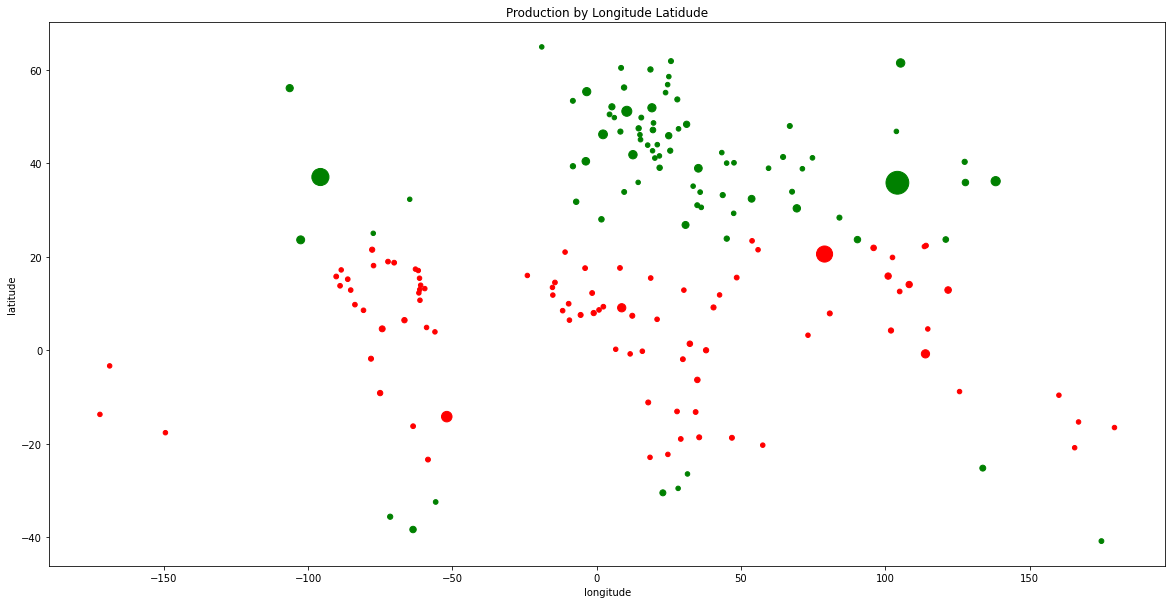

In [17]:
max = region_total['Total Production'].max()
count = region_total['Total Production'].count()
sizes = [20 + x/max * 500 for x in region_total['Total Production']]
colors = ['red' if -23.5 < x < 23.5 else 'green' for x in region_total['latitude']]
region_total.plot.scatter(y='latitude', x='longitude', s=sizes, c=colors, title="Production by Longitude Latidude")

<AxesSubplot:title={'center':'Comparison of Production in Tropics and Temparate regions'}, xlabel='Climate', ylabel='Total Production'>

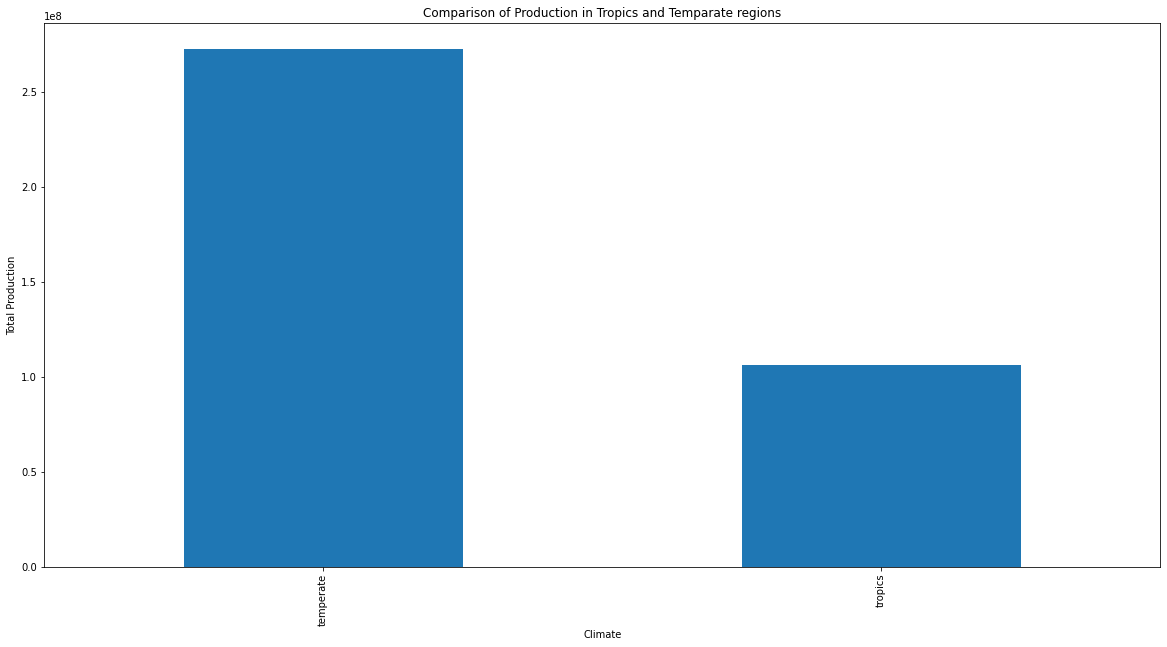

In [12]:
region_total['Climate'] = region_total['latitude'].apply(lambda x: 'tropics' if -23.5 < x < 23.5 else 'temperate')

region_total.groupby('Climate')['Total Production'].sum().plot.bar(xlabel='Climate', ylabel='Total Production', title = 'Comparison of Production in Tropics and Temparate regions')

Based on this, most food is produced in the temperate regions. It would be interesting to find out why but that's beyond the scope of our research.

### Production by item

In [20]:
fao['Item Code'].drop_duplicates().count()

117

In [32]:
item_total = fao.groupby('Item Code').sum()
item_total.drop(item_total.loc[:, "Area Code": "longitude"], axis=1, inplace=True)
target = fao.loc[:, 'Item Code': 'Item'].drop_duplicates()
item_total = item_total.merge(target, how='left', on='Item Code').set_index('Item Code')
item_total['Total Production'] = item_total.loc[:,"Y1961": "Y2013"].sum(axis=1)
item_total.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Item,Total Production
Item Code,,,,,,,,,,,,,,,,,,,,,
2511,138829.0,144643.0,147325.0,156273.0,168822.0,169832.0,171469.0,179530.0,189658.0,195255.0,...,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597,587492,Wheat and products,19194671.0
2513,46180.0,48915.0,51642.0,54184.0,54945.0,55463.0,56424.0,60455.0,65501.0,65772.0,...,100981.0,93310.0,98209.0,99135.0,92563.0,92570.0,88766,99452,Barley and products,4442742.0
2514,168039.0,168305.0,172905.0,175468.0,190304.0,200860.0,213050.0,215613.0,221953.0,226232.0,...,543280.0,573892.0,592231.0,557940.0,584337.0,603297.0,608730,671300,Maize and products,19960640.0
2515,16844.0,16801.0,16141.0,15752.0,16224.0,15771.0,15698.0,15588.0,16373.0,13700.0,...,11361.0,12219.0,13718.0,12947.0,10946.0,10298.0,11201,13601,Rye and products,799672.0
2516,35770.0,37182.0,36530.0,34553.0,34241.0,34220.0,33692.0,33457.0,33912.0,34435.0,...,19418.0,21805.0,22049.0,20541.0,17154.0,19420.0,17579,20154,Oats,1383907.0


#### Trend for select item (Wheat and products)

<AxesSubplot:title={'center':'Total Production of 5 select items over the years'}>

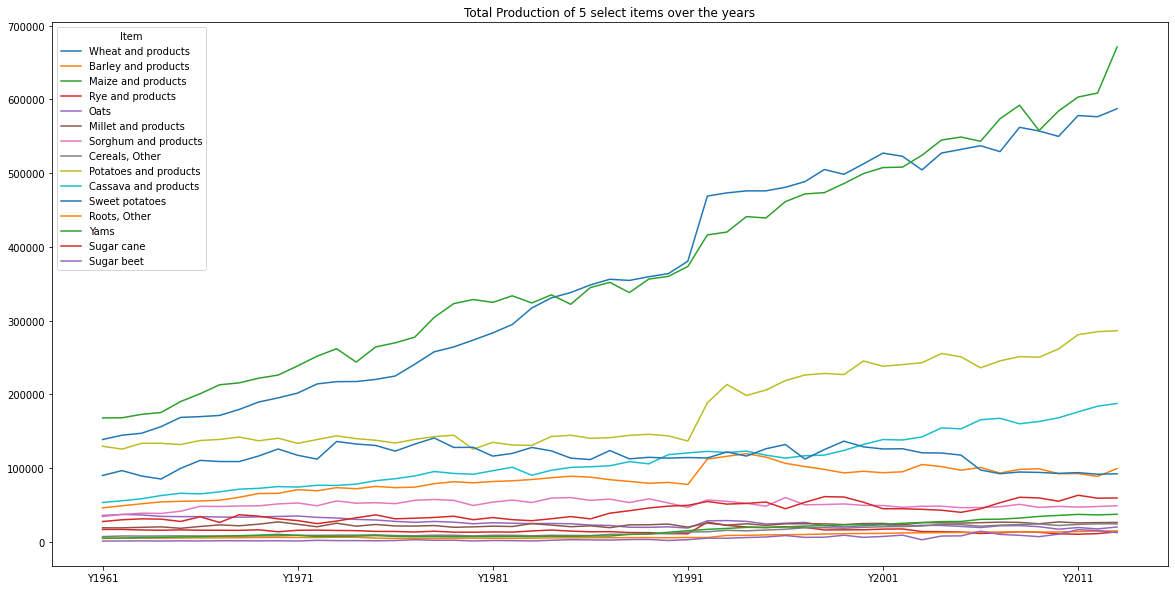

In [49]:
item_total.iloc[0: 15].set_index('Item').loc[:,"Y1961": "Y2013"].T.plot.line(title='Total Production of 15 select items over the years')